In [1]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Conv2D, \
        MaxPooling2D, GlobalMaxPooling2D, Dropout, LeakyReLU, ZeroPadding2D
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
#Set if batch normalization is needed for training the CNN
batch_normalization = True
epochs = 40

def create_model(batch_norm):
    """Creates the CNN model

    Args:
        batch_norm (bool): decides whether to batch normalize the conv layers

    Returns:
        model (Sequential): CNN model
    """
    # If batch normalization, bias can be ignored
    use_bias=True
    if batch_norm:
        use_bias=False
    model = Sequential()

    # Conv layer 1: 3x3 convolution layer and 32 filters,
    model.add(ZeroPadding2D(padding=(1, 1), input_shape=(128, 43, 1),
        data_format="channels_last"))
    model.add(Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 1: 3x3 convolution layer and 32 filters,
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout
    model.add(Dropout(.25))

    # Conv Layer 3: 3x3 convolution layer and 64 filters,
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(64, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 4: 3x3 convolution layer and 64 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(64, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling layer
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout layer
    model.add(Dropout(.25))

    # Conv layer 5: 3x3 convolution layer and 128 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(128, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format = 'channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 6: 3x3 convolution layer and 128 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(128, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling layer
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout layer
    model.add(Dropout(.25))

    # Conv layer 7: 3x3 convolution layer and 256 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(256, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv block 8: 3x3 convolution layer and 256 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(256, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Global max-pool layer
    model.add(GlobalMaxPooling2D(data_format="channels_last"))

    # Dense layer
    model.add(Dense(1024, use_bias=use_bias))
    if batch_norm: model.add(BatchNormalization())

    # dropout layer
    model.add(Dropout(.5))

    model.add(Dense(11, activation='sigmoid'))

    model.summary()

    optimizer = Adam(0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
            metrics=['accuracy'])

    return model

In [3]:
def train_model(model,  X_train, X_val, y_train, y_val, epochs=20):
    """Train the CNN model
    """
    tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                                      write_graph=True, write_images=False)
    checkpoint = ModelCheckpoint('model.h5', 
            verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
    callbacks = [tensorboard, checkpoint]
    
    history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=epochs,
            validation_data=(X_val, y_val), callbacks=callbacks, shuffle=True)
    plt.plot(history.history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

    return model

[ 978. 1290. 1176. 1635. 1914. 1728. 1827. 1644. 1458. 1494. 1953.]
[186. 225. 177. 276. 366. 318. 336. 234. 273. 246. 381.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 130, 45, 1)        0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 130, 45, 32)       288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 130, 45, 32)       0         
                                                                 
 batch_normalization (Batch  (None, 130, 45, 32)       128       
 Normalization)                                                  
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 132, 47, 32)       0       

2023-12-11 13:17:33.295982: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


134/134 [==============================] - ETA: 0s - loss: 2.6093 - accuracy: 0.2416
Epoch 1: val_loss improved from inf to 3.66932, saving model to model.h5
134/134 [==============================] - 37s 115ms/step - loss: 2.6093 - accuracy: 0.2416 - val_loss: 3.6693 - val_accuracy: 0.1127
Epoch 2/40
  1/134 [..............................] - ETA: 7s - loss: 2.4740 - accuracy: 0.2969

/home/abhijith/anaconda3/envs/vt/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/134 [============================>.] - ETA: 0s - loss: 2.0195 - accuracy: 0.3803
Epoch 2: val_loss did not improve from 3.66932
134/134 [==============================] - 9s 65ms/step - loss: 2.0191 - accuracy: 0.3804 - val_loss: 9.5008 - val_accuracy: 0.1113
Epoch 3/40
133/134 [============================>.] - ETA: 0s - loss: 1.7336 - accuracy: 0.4648
Epoch 3: val_loss did not improve from 3.66932
134/134 [==============================] - 9s 71ms/step - loss: 1.7339 - accuracy: 0.4644 - val_loss: 7.4619 - val_accuracy: 0.1256
Epoch 4/40
133/134 [============================>.] - ETA: 0s - loss: 1.5383 - accuracy: 0.5212
Epoch 4: val_loss did not improve from 3.66932
134/134 [==============================] - 10s 76ms/step - loss: 1.5371 - accuracy: 0.5214 - val_loss: 3.7140 - val_accuracy: 0.2744
Epoch 5/40
134/134 [==============================] - ETA: 0s - loss: 1.4220 - accuracy: 0.5573
Epoch 5: val_loss improved from 3.66932 to 1.73171, saving model to model.h5
134/134 [===

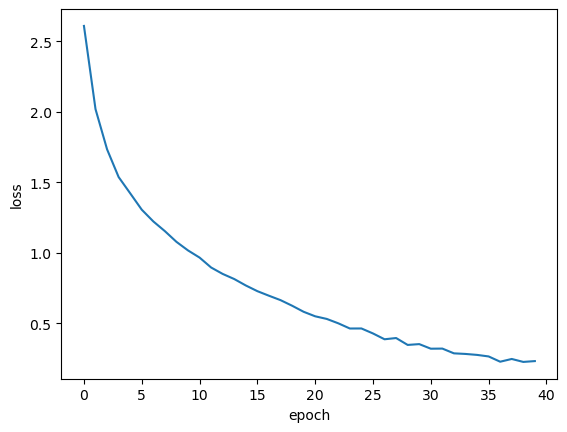

In [4]:
X_train = np.load("X_train.npy") 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
y_train = np.load("y_train.npy")
print(np.sum(y_train, axis=0))

X_val = np.load("X_val.npy")
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
y_val = np.load("y_val.npy")

print(np.sum(y_val, axis=0))

model = create_model(batch_normalization)
model = train_model(model, X_train, X_val, y_train, y_val, epochs)